Reading / Understanding the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# load dataset
df = pd.read_csv('car_dataset.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# rows x columns
df.shape

(301, 9)

In [5]:
# quick data desrciption
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# rename Owner to if has past_owner
df.rename(columns={'Owner':'Past_Owner'}, inplace=True)

# check # of values per categorical attributes
categorical_attr = ['Fuel_Type','Seller_Type','Transmission','Past_Owner']

for i in categorical_attr:
    print('attr: {} contains\n{}\n'.format(i,df[i].value_counts()))

attr: Fuel_Type contains
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

attr: Seller_Type contains
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

attr: Transmission contains
Manual       261
Automatic     40
Name: Transmission, dtype: int64

attr: Past_Owner contains
0    290
1     10
3      1
Name: Past_Owner, dtype: int64



In [7]:
# summary of numerical attr
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


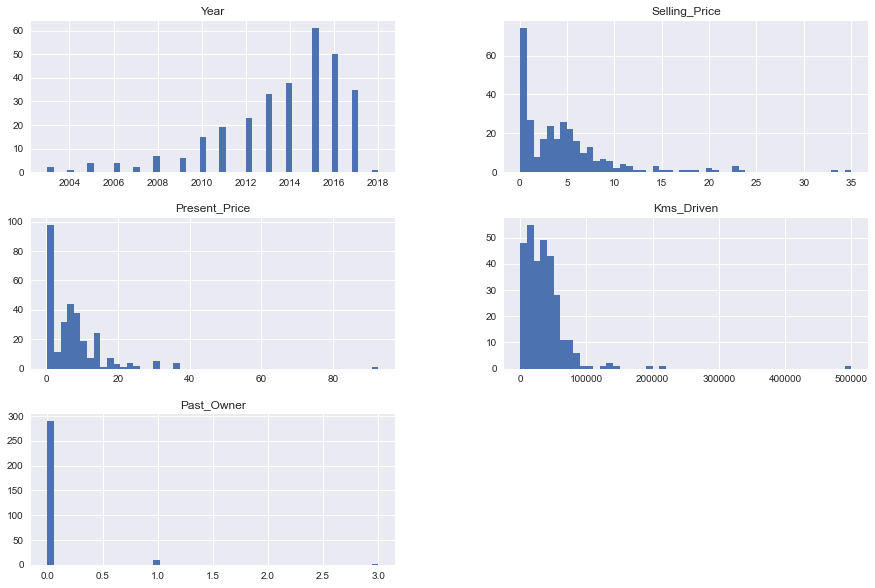

In [8]:
# also to check numerical data type with histograms (see distr)
df.hist(bins=50, figsize=(15,10))
plt.show()

In [9]:
# check if there are any missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Past_Owner       0
dtype: int64

Data Preprocessing

In [10]:
# we can add another attr as we have car Year (Car Age) & drop Year
df['Age'] = 2021 - df['Year']

In [11]:
df.drop('Year', axis=1, inplace=True)
# check dataset to see changes above
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Exploratory Data Analysis (EDA)

 - Univariate Analysis

In [12]:
# check columns
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Past_Owner', 'Age'],
      dtype='object')

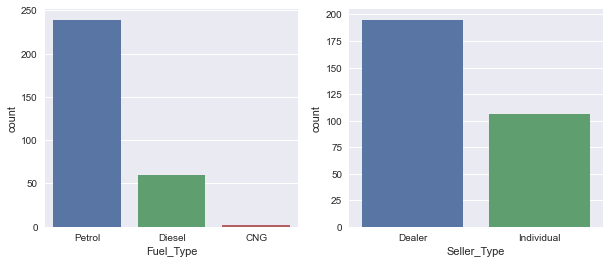

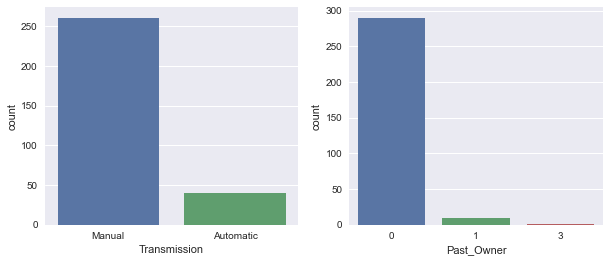

In [13]:
# similar to what was done previously with Cat Attrs 
# but this time plotting them to show quantities per type
categorical_attr = ['Fuel_Type','Seller_Type','Transmission','Past_Owner']

i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=categorical_attr[i], data=df)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=categorical_attr[i], data=df)
    i += 1

    plt.show()

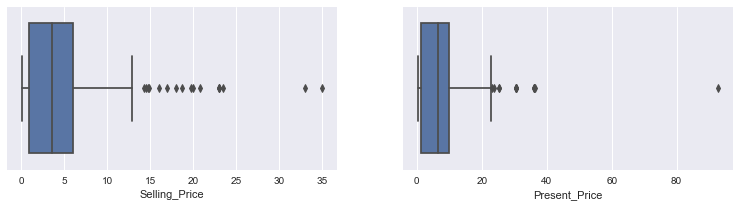

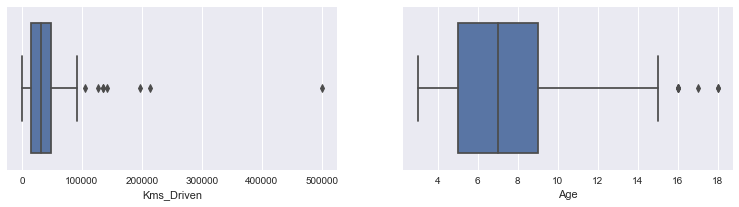

In [14]:
# now for numerical attrs
numerical_attr = ['Selling_Price','Present_Price','Kms_Driven','Age']

i = 0
while i < 4:
    fig = plt.figure(figsize=[13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=numerical_attr[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical_attr[i], data=df)
    i += 1

    plt.show()

 - Multivariate Analysis

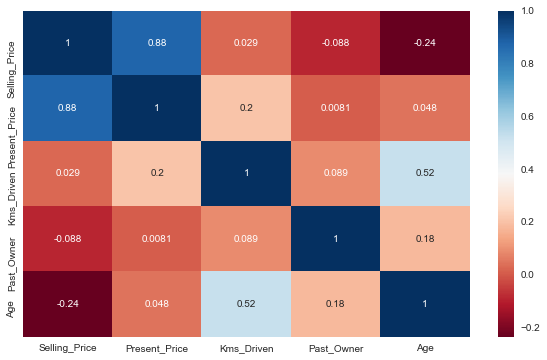

In [15]:
# heatmap correlation
fig = plt.figure(figsize=[10,6])
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

array([[<AxesSubplot:xlabel='Selling_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Age', ylabel='Selling_Price'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Age', ylabel='Present_Price'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Kms_Driven'>,
        <AxesSubplot:xlabel='Age', ylabel='Kms_Driven'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Age'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Age'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Age'>,
        <AxesSubplot:xlabel='Ag

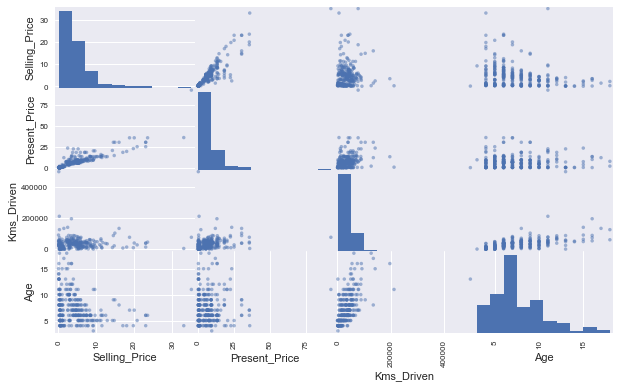

In [16]:
# use scatter matrix to see correlationa
scatter_matrix(df[numerical_attr], figsize=(10,6))

In [17]:
# corr in order per attr
df.corr()['Selling_Price']

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Past_Owner      -0.088344
Age             -0.236141
Name: Selling_Price, dtype: float64

Data Preparation

 - encoding / dummies for categorical features

In [18]:
# drop car name as it won't be needed
df.drop(labels='Car_Name', axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [19]:
df_final = pd.get_dummies(data=df, drop_first=True)
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Past_Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Simple Linear Regression (w/ X = Selling Price)

Train Test Split

In [20]:
# separating target variable & features
y = df_final['Selling_Price']
X = df_final[['Present_Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 1)
x test:  (61, 1)
y train:  (240,)
y test:  (61,)


In [21]:
# Linear Reg
lm = LinearRegression()
lm.fit(X_train, y_train)

# coefficient
print("coeficient is:", lm.coef_)
print('intercept is : ', lm.intercept_)
print("formula: y = mx + b - turns out to be:")
print(f"Y = {lm.coef_} * x + {lm.intercept_}")

coeficient is: [0.5158939]
intercept is :  0.7448738223910154
formula: y = mx + b - turns out to be:
Y = [0.5158939] * x + 0.7448738223910154


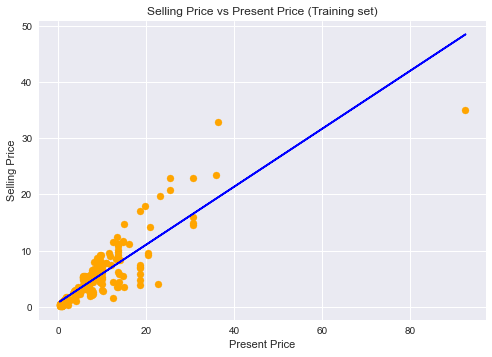

In [22]:
# visualize Training set results
plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('Selling Price vs Present Price (Training set)')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

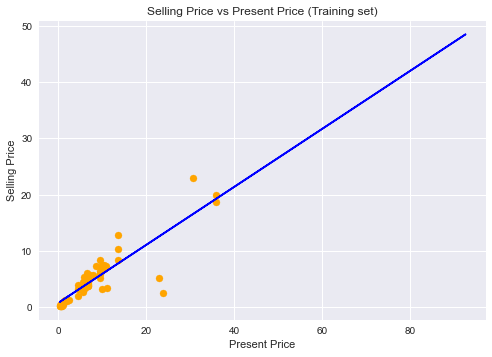

In [23]:
# visualize Training set results
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('Selling Price vs Present Price (Training set)')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 0, 'Y test')

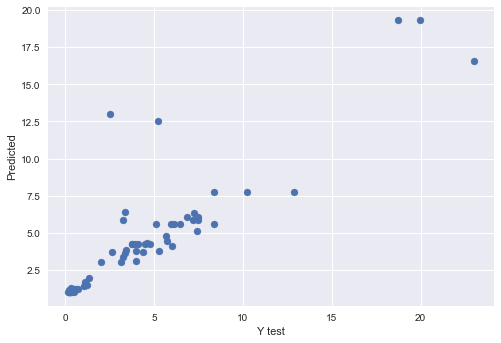

In [24]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

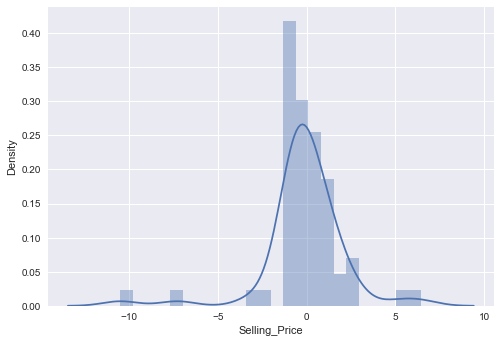

In [25]:
# explore residuals
sns.distplot((y_test-predictions))

In [26]:
# evaluate the model
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 1.3010675054413772
MSE: 4.914031817093612
RMSE: 2.2167615607217686


for example - if we use the following Present Prices, our Selling Prices will be:
    

In [27]:
print("present price of 20 - is equivalent of Selling Price: ", lm.predict([[20]]))
print("present price of 40 - is equivalent of Selling Price: ", lm.predict([[40]]))
print("present price of 60 - is equivalent of Selling Price: ", lm.predict([[60]]))

present price of 20 - is equivalent of Selling Price:  [11.06275181]
present price of 40 - is equivalent of Selling Price:  [21.3806298]
present price of 60 - is equivalent of Selling Price:  [31.69850779]


## This section contains actual Modelling with all features, scoring & model comparison

Train Test Split

In [28]:
# Separating target variable and its features
y = df_final['Selling_Price']
X = df_final.drop('Selling_Price',axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [30]:
CV, R2_train, R2_test = ([] for i in range(3))

# function to evaluate & score models
def prediction_model(model, model_name):
    # training model
    model.fit(X_train, y_train)
    # R2 score for train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    # R2 score for test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    # R2 mean of train set using Cross Validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))    
    # print results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()    

Model Creation / Evaluation

## Linear (Multiple) Regression

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


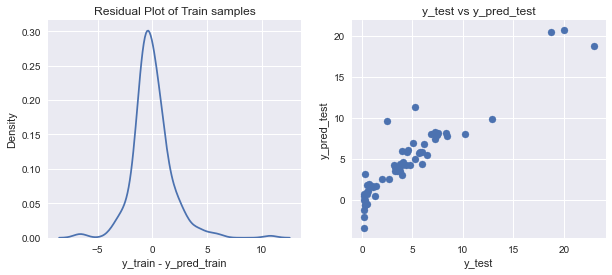

In [31]:
lr = LinearRegression()
prediction_model(lr,"Linear_regressor.pkl")

 - show how this model predicts this dataset

In [32]:
print('Intercept: \n', round(lr.intercept_,4))
print()
print('Coefficients: \n', lr.coef_.round(4))

Intercept: 
 5.8339

Coefficients: 
 [ 0.4372 -0.      0.3459 -0.4133  2.2305  0.4585 -1.2093 -1.8701]


In [33]:
for i in lr.coef_:
    print(i)

0.4372339757136826
-5.306139436910217e-06
0.34591284854797616
-0.41327009838727424
2.2305076962841373
0.4585492170519316
-1.2092781390147112
-1.8701432669123734


In [34]:
for i in df_final.columns:
    print(i)

Selling_Price
Present_Price
Kms_Driven
Past_Owner
Age
Fuel_Type_Diesel
Fuel_Type_Petrol
Seller_Type_Individual
Transmission_Manual


Formula:

In [35]:
print(f"Selling Price = {round(lr.intercept_,4)} + ({lr.coef_.round(4)[0]})*X1 + ({lr.coef_.round(4)[1]})*X2 + ...")

Selling Price = 5.8339 + (0.4372)*X1 + (-0.0)*X2 + ...


## Ordinary Least Squares 
 - (just to observe but these coefficients/intercepts won't be used)

In [36]:
# table with summary of model
''' Note: results are slightly different than from sklearn but still very similar (same R2 squared) 
 - there are warnings of multicolinearity -> cool to know but will ignore for now'''

 
# add constant
X = sm.add_constant(X)

# ordinary least squares
model = sm.OLS(y,X).fit()
predict_ = model.predict(X)

# model summary
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          5.71e-131
Time:                        12:00:53   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

## Ridge

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912126 0.8983878  0.82980292 0.81769305 0.73377277]
Train CV mean : 0.84


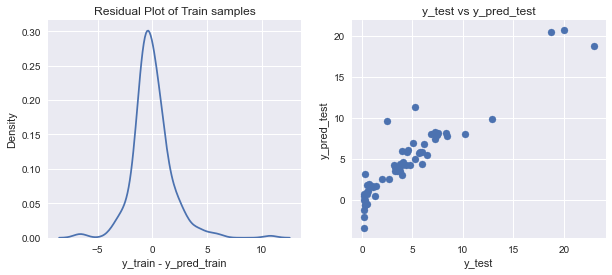

In [37]:
# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

prediction_model(rg_rs,"ridge.pkl")

## Lasso

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89913828 0.89975361 0.83196652 0.81785432 0.70210321]
Train CV mean : 0.83


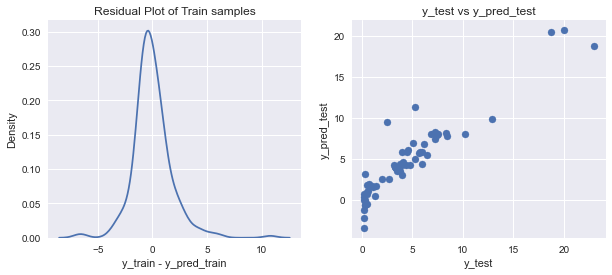

In [38]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))

prediction_model(ls_rs, "lasso.pk1")

## Random Forest

Train R2-score : 0.91
Test R2-score : 0.77
Train CV scores : [0.91478993 0.9519767  0.85237192 0.88608327 0.7418209 ]
Train CV mean : 0.87


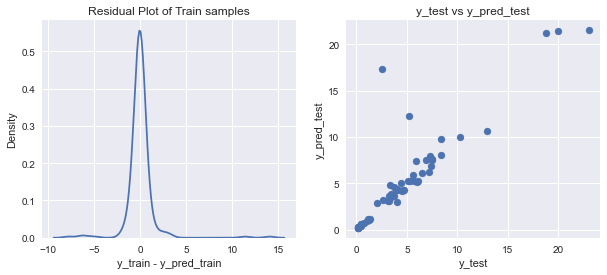

In [39]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

prediction_model(rf_rs,'random_forest.pkl')

In [40]:
print(rf_rs.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


## Gradient Boosting

In [41]:
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.97
Test R2-score : 0.78
Train CV scores : [0.94469217 0.90537555 0.88607836 0.94402713 0.63698526]
Train CV mean : 0.86


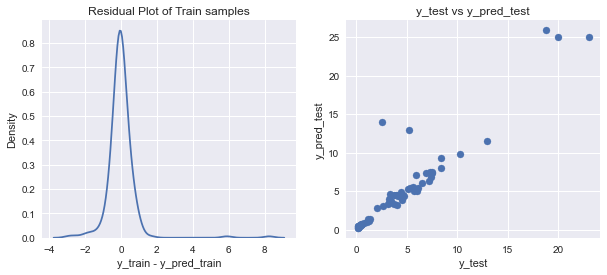

In [42]:
prediction_model(gb_rs,"gradient_boosting.pkl")

In [44]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.91,0.77,0.87
4,GradientBoostingRegressor,0.97,0.78,0.86
